# Linear Regression with multiple variables

In this notebook I look at data set based on heart failure statistics. I run a few dt analysis queries to get an understanding of the data. I then build a Linear Regresssion model to use to predict survivability based on a few select variables. I know going into this that Linear Regression is not the best model to use as this is basically a classification challenge - either the person survives or does not. 
Using the data set as practice. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
data = pd.read_csv(r'C:\Users\v-joecamp\OneDrive - Microsoft\Desktop\Jupyter Notebook\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
print(data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [2]:
gender_counts = data['sex'].value_counts()
print(gender_counts)

sex
1    194
0    105
Name: count, dtype: int64


In [7]:
## average of total population
data[['age']].mean()

age    60.833893
dtype: float64

In [8]:
##average age by sex male = 0, female = 1
data.groupby('sex').agg({'age' : 'mean'})

,age
sex,
0,59.777781
1,61.405500


In [26]:
##create a data set for the females
female_data = data[data['sex'] == 1]
female_data.head(10)
    

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,1,10,1


In [23]:
female_death_counts = female_data['DEATH_EVENT'].value_counts()
print(female_death_counts)

DEATH_EVENT
0    132
1     62
Name: count, dtype: int64


In [28]:
female_deaths = female_data[female_data['DEATH_EVENT'] == 1]
female_deaths.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [13]:
male_data = data[data['sex'] == 0]
male_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
14,49.0,1,80,0,30,1,427000.00,1.0,138,0,0,12,0
18,70.0,1,125,0,25,1,237000.00,1.0,140,0,0,15,1
19,48.0,1,582,1,55,0,87000.00,1.9,121,0,0,15,1


In [24]:
male_death_counts = male_data['DEATH_EVENT'].value_counts()
print(male_death_counts)

DEATH_EVENT
0    71
1    34
Name: count, dtype: int64


In [3]:
X = data[['age', 'diabetes', 'sex', 'smoking']]
y = data['DEATH_EVENT']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print('Mean Absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute error: 0.42651142132607184
Mean Squared Error: 0.23062956078720276
Root Mean Squared Error: 0.48023906628595175


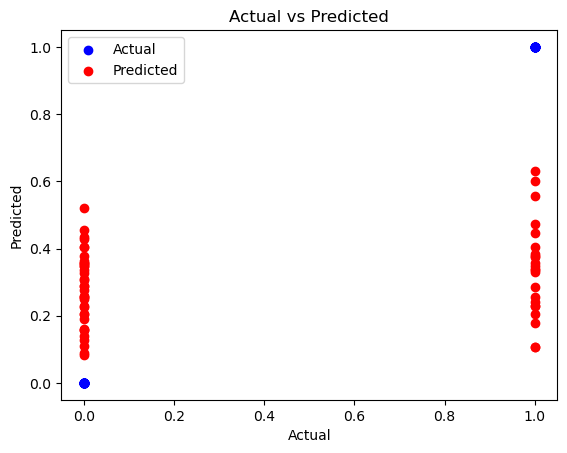

In [26]:
plt.scatter(y_test, y_test, color = 'blue', label = 'Actual')
plt.scatter(y_test, y_pred, color = 'red', label = 'Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Conclusion - For this data set, the target variable is either 0 or 1. The use of a Linear Regression model as a predictive model is not the best - a Logistic Regression model is better as this is consider a classification proble. Keeping this in mind, the Mean Aboslute error of .426 indicates the predictive abilities of this model are not great since the target variables are either 0 or 1. The target variables also negatively impact the suggestive model predictability values of the Mean Squared Error and the Root Mean Squared Error.  